In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### KNN TEST

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
X = [[0],[1],[2],[3]]
y = [0,0,1,1]

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [11]:
print(knn.predict([[1.1]]))
print(knn.predict_proba([[1.1]]))

[0]
[[0.66666667 0.33333333]]


In [68]:
iris = pd.read_csv("datasets/iris.data")
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
X = iris.iloc[:,:-1].values
y = iris.iloc[:,-1].values

numpy.ndarray

In [70]:
print(X[1:5])
print(y[1:5])

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


### Encode species from text to int

In [71]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [76]:
labels = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' :2}
y = iris["species"].map(lambda label : labels[label])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


## Visualization

### Andrews Curves

In [85]:
iris = pd.read_csv("datasets/iris.data")
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa


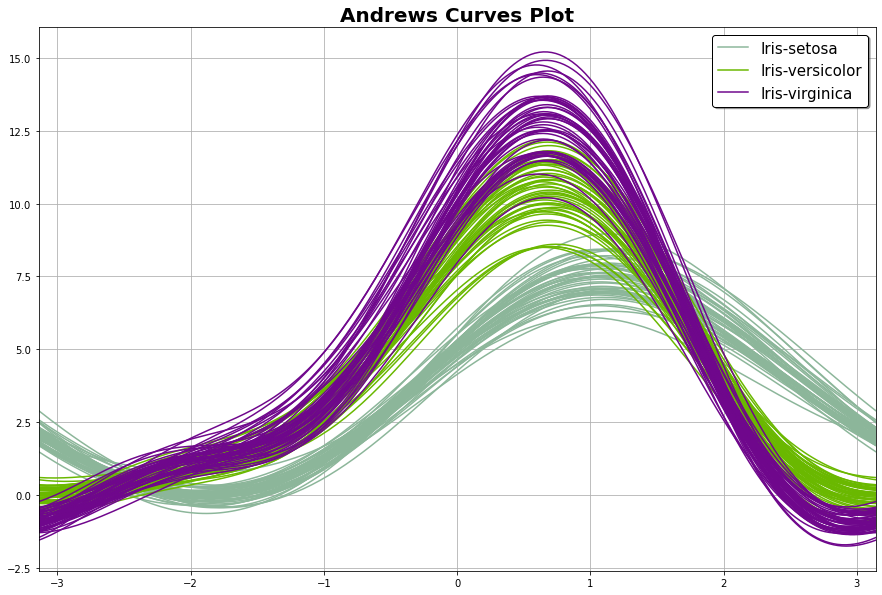

In [87]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(iris, "species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [89]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [102]:
def knn_comparison1(k):
    iris = pd.read_csv("datasets/iris.data")
    iris = iris[iris.species != 'Iris-virginica']
    x = iris.iloc[:,0:2].values
    y = iris.iloc[:,-1].values
    labels = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' :2}
    y = iris["species"].map(lambda label : labels[label]).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
    plot_decision_regions(x, y, clf=clf, legend=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K='+ str(k))
    plt.show()

In [105]:
def knn_comparison2(k):
    iris = pd.read_csv("datasets/iris.data")
    iris = iris[iris.species != 'Iris-setosa']
    x = iris.iloc[:,0:2].values
    y = iris.iloc[:,-1].values
    labels = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' :2}
    y = iris["species"].map(lambda label : labels[label]).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
    plot_decision_regions(x, y, clf=clf, legend=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K='+ str(k))
    plt.show()

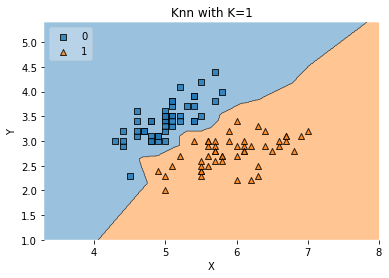

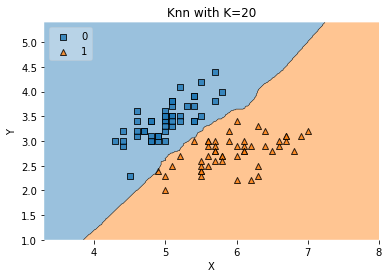

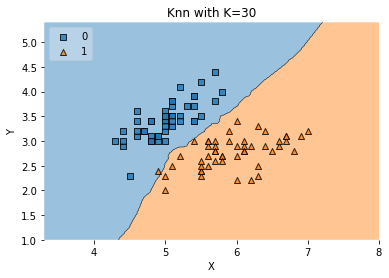

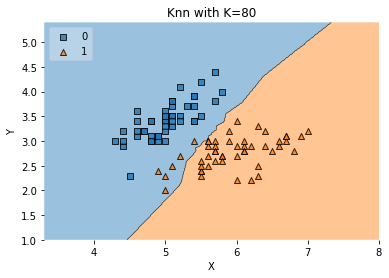

In [107]:
for i in [1,20,30,80]:
    knn_comparison(i)

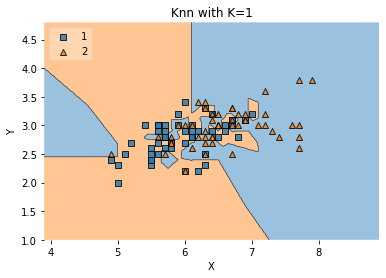

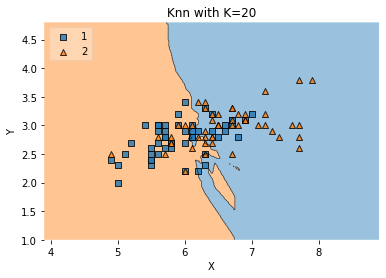

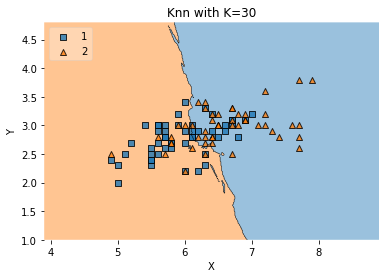

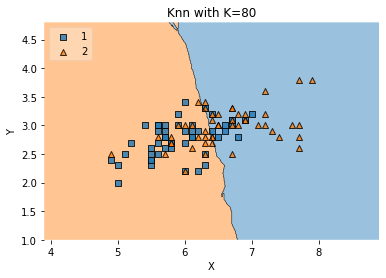

In [108]:
for i in [1,20,30,80]:
    knn_comparison2(i)